## Results of GEO experiment
 ---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
twostages = pd.read_csv('../../crowdED/data/20190525GEO2stg.csv')
onestage = pd.read_csv('../../crowdED/data/20190525GEO1stg.csv')

In [3]:
len(twostages)

3078

In [4]:
#twostages = twostages.loc[:, twostages.columns != 'proportion_hard_tasks']

In [5]:
print('Number of simulations {}\nFailed simulations {}%'.format(
    len(twostages),round(len(twostages[twostages['accuracy'] == 0]) *100/ len(twostages)),2))

Number of simulations 3078
Failed simulations 18%


In [6]:
print('Number of simulations {}\nFailed simulations {}%'.format(
    len(onestage),round(len(onestage[onestage['accuracy'] == 0]) *100/ len(twostages)),2))

Number of simulations 3078
Failed simulations 0%


## Accuracy one stage vs two stages

In [7]:
import scipy.stats as stats

In [8]:
df_two = twostages[twostages['accuracy'] != 0]
df_one = onestage.loc[[j for j in set(onestage.index)-set(twostages[twostages['accuracy'] == 0].index)]]

In [9]:
df_one.columns

Index(['total_tasks', 'total_workers', 'proportion_hard_tasks',
       'proportion_train_tasks', 'workers_per_task', 'total_keys', 'accuracy',
       'cross_entropy', 'f1'],
      dtype='object')

In [10]:
#mapping the working dataset
#df_two.to_csv('../crowdedsimulations.csv')

In [11]:
print('Average Accuracy \n One Stage: {} (SD {}) \n Two Stages: {} (SD {})'.format(
    round(df_one['accuracy'].mean(),3), round(df_one['accuracy'].std(),3), 
    round(df_two['accuracy'].mean(),3), round(df_two['accuracy'].std(),3)))

Average Accuracy 
 One Stage: 0.938 (SD 0.005) 
 Two Stages: 0.968 (SD 0.015)


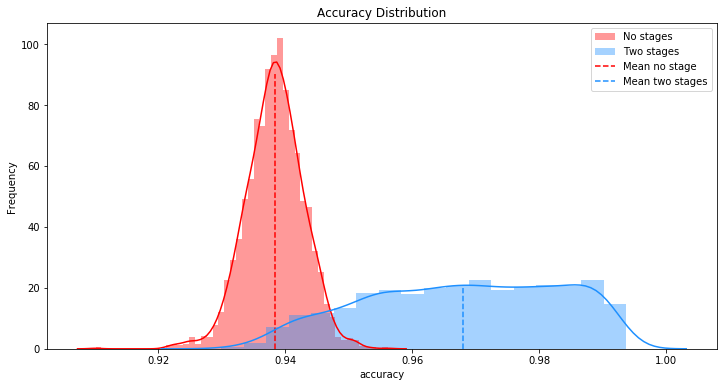

In [12]:
plt.figure(figsize=[12, 6])
sns.distplot(df_one['accuracy'], color='r', label='No stages')
sns.distplot(df_two['accuracy'], color='dodgerblue', label='Two stages')
plt.vlines(x=df_one['accuracy'].mean(),ymin=0,ymax=90, color='r', linestyles='--', label='Mean no stage')
plt.vlines(x=df_two['accuracy'].mean(),ymin=0,ymax=20, color='dodgerblue', linestyles='--', label='Mean two stages')
plt.ylabel('Frequency'); plt.title('Accuracy Distribution')
plt.legend()
plt.savefig('../accuracy_distribution_geo.png')

Statistical difference

In [13]:
stats.ttest_rel(df_one['accuracy'],df_two['accuracy'])

Ttest_relResult(statistic=-94.31614714620066, pvalue=0.0)

Method with a training performs better

## The best scenarios in a 2 stage experiment

In [14]:
accu = 0.965 #expected real accuracy
df_filter = df_two[df_two['accuracy'] >= accu]

In [15]:
df_filter.head()

,total_tasks,total_workers,proportion_hard_tasks,proportion_train_tasks,workers_per_task,total_keys,accuracy,cross_entropy,f1
0,1643,30,0,0.10,3,9,0.9921,3.1659,0.9922
1,1643,30,0,0.10,5,9,0.9926,3.1678,0.9926
2,1643,30,0,0.10,7,9,0.9937,3.1653,0.9937
3,1643,30,0,0.10,9,9,0.9911,3.1682,0.9911
9,1643,30,0,0.15,3,9,0.9886,3.1672,0.9885


In [16]:
df_filter = df_filter[['total_tasks','total_workers','proportion_train_tasks','workers_per_task','accuracy']]

In [17]:
print('Best scenarios in a 2 stage experiment: {} ({}%)'.format(len(df_filter), round(len(df_filter)*100/len(df_two),2)))

Best scenarios in a 2 stage experiment: 1471 (58.07%)


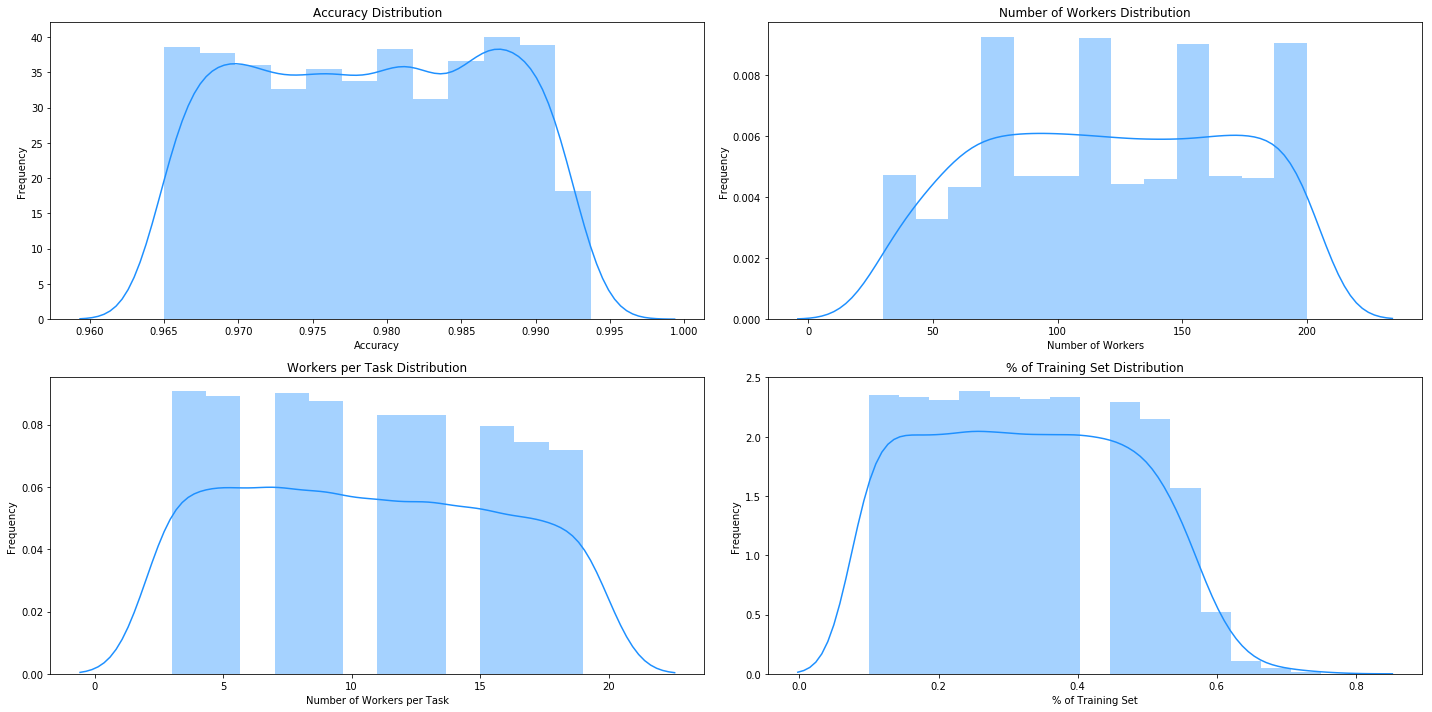

In [18]:
plt.figure(figsize=[20, 10])
plt.subplot(2,2,1)
sns.distplot(df_filter['accuracy'], color='dodgerblue', axlabel='Accuracy')
plt.ylabel('Frequency'); plt.title('Accuracy Distribution')
plt.subplot(2,2,2)
sns.distplot(df_filter['total_workers'], color='dodgerblue', axlabel='Number of Workers')
plt.ylabel('Frequency'); plt.title('Number of Workers Distribution')
plt.subplot(2,2,3)
sns.distplot(df_filter['workers_per_task'], color='dodgerblue', axlabel='Number of Workers per Task')
plt.ylabel('Frequency'); plt.title('Workers per Task Distribution')
plt.subplot(2,2,4)
sns.distplot(df_filter['proportion_train_tasks'], color='dodgerblue', axlabel='% of Training Set')
plt.ylabel('Frequency'); plt.title('% of Training Set Distribution')
plt.tight_layout()
plt.savefig('../distribution_best_scenarios_geo.png')

In [19]:
df_filter.columns

Index(['total_tasks', 'total_workers', 'proportion_train_tasks',
       'workers_per_task', 'accuracy'],
      dtype='object')

In [21]:
print('Average Number of Workers \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['total_workers'].mean(),3), round(df_filter['total_workers'].std(),3)))

Average Number of Workers 
 Best Scenarios: 120.768 (SD 49.03)


In [23]:
print('Average % of Train Tasks \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['proportion_train_tasks'].mean(),3), round(df_filter['proportion_train_tasks'].std(),3)))

Average % of Train Tasks 
 Best Scenarios: 0.324 (SD 0.147)


In [24]:
print('Average Workers per Task \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['workers_per_task'].mean(),3), round(df_filter['workers_per_task'].std(),3)))

Average Workers per Task 
 Best Scenarios: 10.611 (SD 5.112)
